In [2]:
import random 
import numpy as np 
import matplotlib.pyplot as plt 
from sklearn.cluster import KMeans 
from sklearn.datasets import make_blobs 
%matplotlib inline
from fetch_request import download

In [ ]:
import warnings
warnings.filterwarnings("ignore")

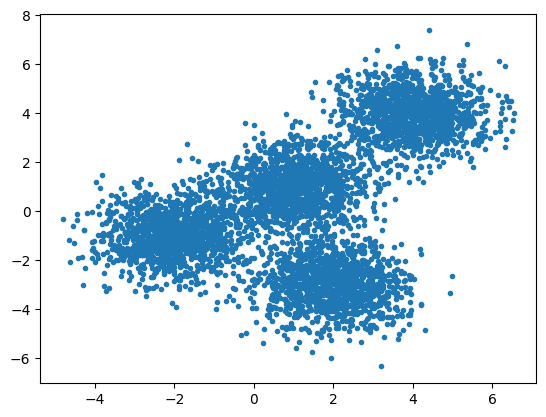

In [11]:
np.random.seed(14)

X, y = make_blobs(n_samples=5000, centers=[[4,4], [-2, -1], [2, -3], [1, 1]], cluster_std=0.9)
plt.scatter(X[:, 0], X[:, 1], marker='.')

In [13]:
k_means = KMeans(init="k-means++", n_clusters=3, n_init=12)
k_means.fit(X)

k_means_labels = k_means.labels_
k_means_labels

array([1, 1, 1, ..., 1, 1, 1])

In [16]:
k_means_cluster_centers = k_means.cluster_centers_
k_means_cluster_centers

array([[ 3.60296286,  3.60576133],
       [-0.84172799, -0.2089842 ],
       [ 1.98632113, -2.93711391]])

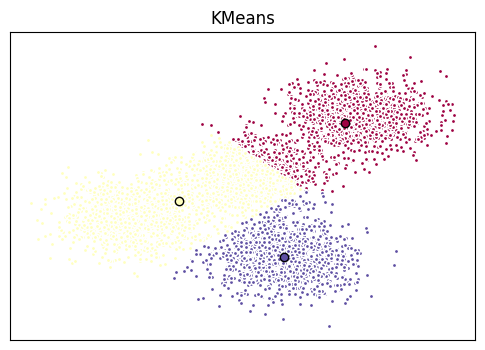

In [22]:
fig = plt.figure(figsize=(6, 4))
ax = fig.add_subplot(1, 1, 1)
""" 
Colors uses a color map, which will produce an array of colors based on
the number of labels there are. We use set(k_means_labels) to get the
unique labels.
"""
colors = plt.cm.Spectral(np.linspace(0, 1, len(set(k_means_labels))))
for k, col in zip(range(len([[4,4], [-2, -1], [2, -3], [1, 1]])), colors):
    """ 
    Create a list of all data points, where the data points that are
    in the cluster (ex. cluster 0) are labeled as true, else they are
    labeled as false.
    """
    my_members = (k_means_labels == k)
    """ 
    Define the centroid, or cluster center.
    """
    cluster_center = k_means_cluster_centers[k]
    """ 
    Plots the datapoints with color col.
    """
    ax.plot(X[my_members, 0], X[my_members, 1], 'w', markerfacecolor=col, marker='.')
    """ 
    Plots the centroids with specified color, but with a darker outline
    """
    ax.plot(cluster_center[0], cluster_center[1], 'o', markerfacecolor=col,  markeredgecolor='k', markersize=6)

ax.set_title('KMeans')
ax.set_xticks(())
ax.set_yticks(())
plt.show()

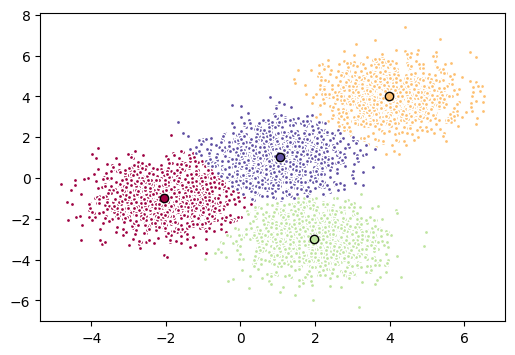

In [25]:
k_means_4 = KMeans(init="k-means++", n_clusters=4, n_init=12)
k_means_4.fit(X)

fig = plt.figure(figsize=(6, 4))
colors = plt.cm.Spectral(np.linspace(0, 1, len(set(k_means_4.labels_))))
ax = fig.add_subplot(1, 1, 1)
for k, col in zip(range(len([[4,4], [-2, -1], [2, -3], [1, 1]])), colors):
    members = (k_means_4.labels_ == k)
    cluster_center = k_means_4.cluster_centers_[k]
    ax.plot(X[members, 0], X[members, 1], 'w', markerfacecolor=col, marker='.')
    ax.plot(cluster_center[0], cluster_center[1], 'o', markerfacecolor=col,  markeredgecolor='k', markersize=6)
plt.show()